In [3]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2018-05-29 10:47:17,949 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-05-29 10:49:15,289 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz


In [4]:
model.init_sims(replace=True)

2018-05-29 10:49:50,003 : INFO : precomputing L2-norms of word weight vectors


In [50]:
def collect_words(filename):
    with open (filename,'r', encoding='utf-8') as f:
        words = f.readlines()
    return words

In [43]:
def preprocessing_words(words):
    new_words = []
    for word in words:
        new_words.append(word.strip())
    return new_words

In [44]:
def words_to_graph(words):
    all_words = {}
    for word in words:
        to_graph = []
        try:
            rest_words = words
            if word in model:
                for word_r in rest_words:
                    if model.similarity(word, word_r)>0.5 and model.similarity(word, word_r)!= 1:
                        to_graph.append(word_r.strip('_VERB'))
            all_words[word.strip('_VERB')] = to_graph
        except KeyError:
            pass
    return all_words

In [71]:
def create_graph(words):
    import networkx as nx
    G = nx.Graph()
    G.add_nodes_from(words)
    return G

def create_edges(G, words, all_words):
    for word in words:
        for word2 in all_words[word]:
            G.add_edge(word, word2)
    return G
        


In [72]:
def draw_graph(G):
    import matplotlib.pyplot as plt 

    pos=nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=50) # рисуем узлы красным цветом, задаём размер узла
    nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
    plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
    nx.draw_networkx_labels(G, pos, font_size=15, font_family='Verdana')
    plt.show() # что получилось?

In [81]:
def graph_info(G):
    deg = nx.degree_centrality(G)
    print('5 самых центральных слов:')
    for nodeid in sorted(deg, key=deg.get, reverse=True)[:5]:
        print('\t', nodeid)
    print('Радиус графа:', nx.radius(G))
    print('Коэффициент кластеризации:', nx.average_clustering(G))

In [82]:
def main_func():
    init_words = collect_words('words_sing.txt')
    words = preprocessing_words(init_words)
    dict_edges = words_to_graph(words)
    words = list(dict_edges.keys())
    G = create_graph(words)
    create_edges(G, words, dict_edges)
    draw_graph(G)
    graph_info(G)    

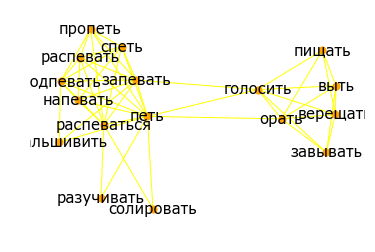

5 самых центральных слов:
	 петь
	 распеваться
	 запевать
	 спеть
	 распевать
Радиус графа: 2
Коэффициент кластеризации: 0.8426406926406929


In [83]:
main_func()